In [35]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualizer import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualizer
import logic

import importlib
from sklearn.pipeline import Pipeline
from swimnetworks import Dense, Linear

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualizer)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\temp-sampled\\sampled-networks\\logic.py'>

In [36]:
xd = 2  # Input space dimensions
yd = 4  # Output dimension
num_samples = 40  # Number of data points
layer_width = 20

dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

In [37]:
steps = [
    (
        "dense",
        Dense(
            layer_width=layer_width,
            activation="relu",
            parameter_sampler="relu",
            random_seed=42,
        ),
    ),
    ("linear", Linear(regularization_scale=1e-10)),
]
model_swim = Pipeline(steps)

model_swim.fit(dataset.X_train, dataset.y_train)

model_base = BaseModel()
model_base.weights = [
    model_swim.get_params()["steps"][0][1].weights,
    model_swim.get_params()["steps"][1][1].weights,
]
model_base.biases = [
    -model_swim.get_params()["steps"][0][1].biases[0],
    -model_swim.get_params()["steps"][1][1].biases[0],
]


y_predict = model_base.predict(dataset.X_test)
y_swim = model_swim.predict(dataset.X_test)

print(f"Predictions from 'model_base' and 'model_swim' are equal: {np.array_equal(y_predict, y_swim)}")

Predictions from 'model_base' and 'model_swim' are equal: True


In [38]:
# model_adam = NeuralNet()
# model_adam.fit(dataset.X_train, dataset.y_train, [layer_width])

# model_base = model_adam

Layer1 sampling: 100%|██████████| 20/20 [00:00<00:00, 5002.45it/s]


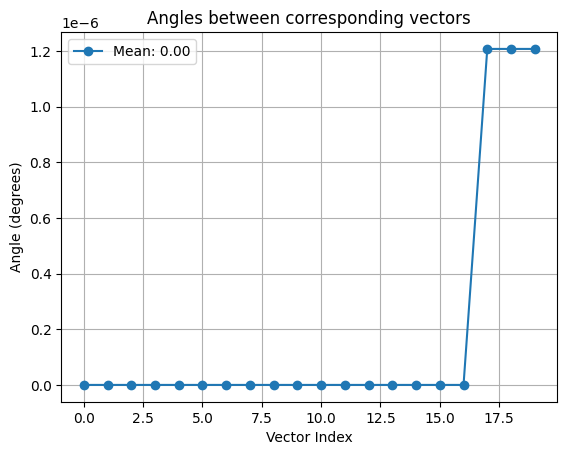

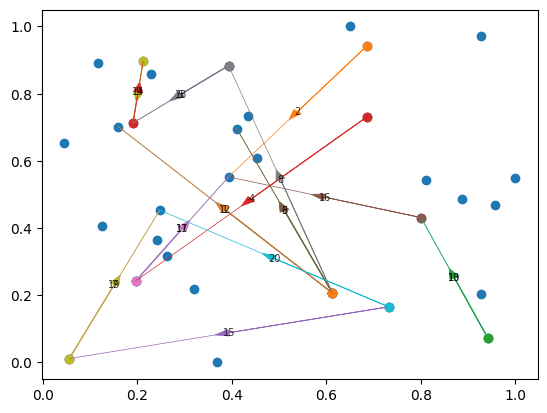

In [39]:
weights_l1, biases_l1, x_1_x2_tuples = compute_weights_biases_layer1(
    dataset.X_train, model_base.weights, model_base.biases
)

plot_vector_differences([weights_l1], [model_base.weights[0]])

plot_weight_vectors_and_point_pairs(dataset.X_train, x_1_x2_tuples, np.transpose(model_base.weights[0]))

Final Validation Loss: 1.7677


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 1706.23it/s]


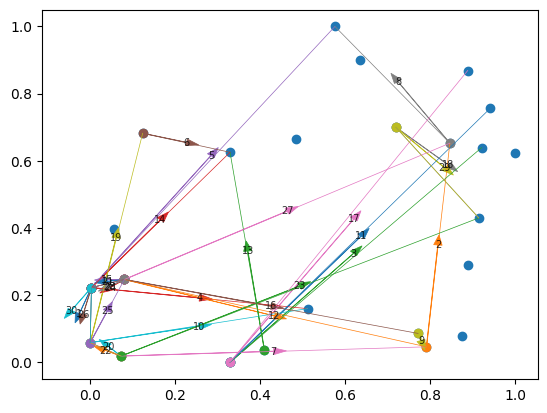

Final Validation Loss: 1.5544


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2000.62it/s]


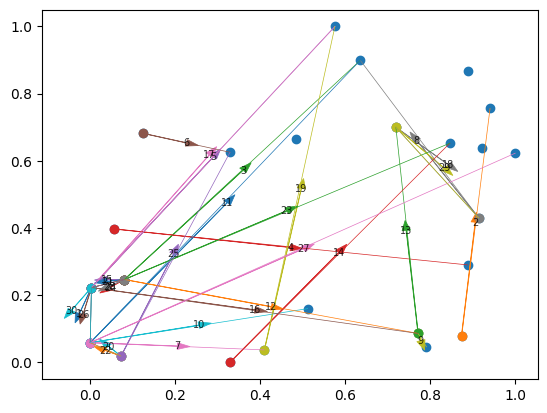

Final Validation Loss: 1.3875


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2307.18it/s]


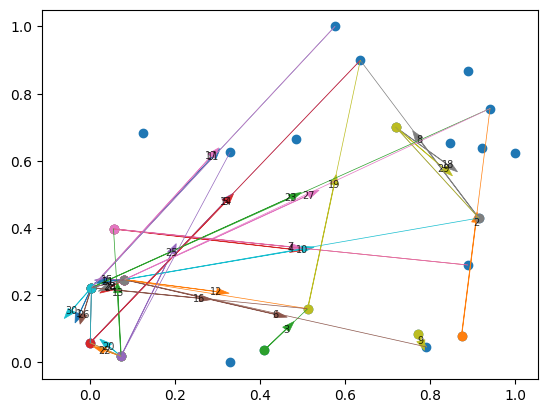

Final Validation Loss: 1.2263


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2036.76it/s]


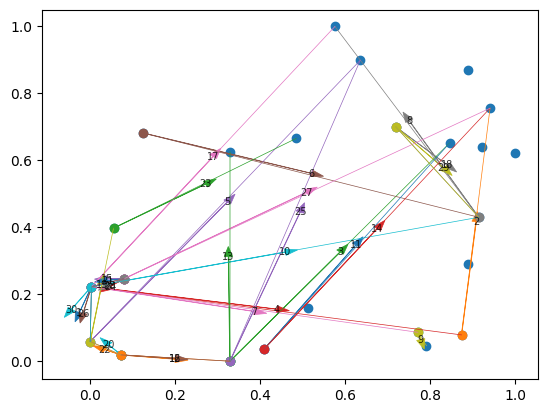

Final Validation Loss: 1.0751


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2142.14it/s]


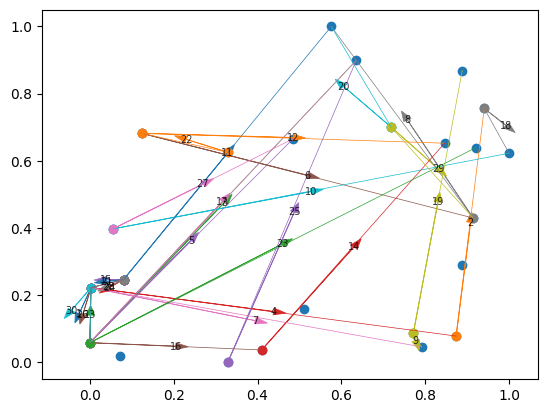

Final Validation Loss: 0.9350


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2243.70it/s]


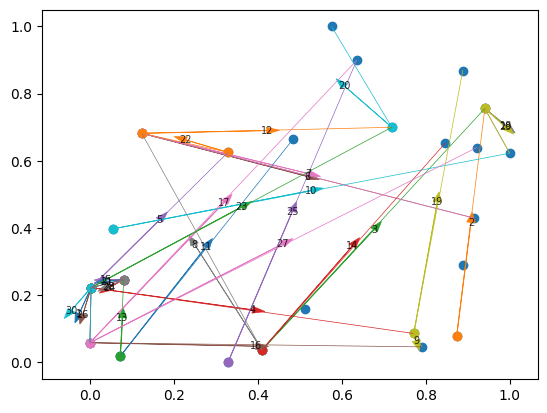

Final Validation Loss: 0.8048


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2089.25it/s]


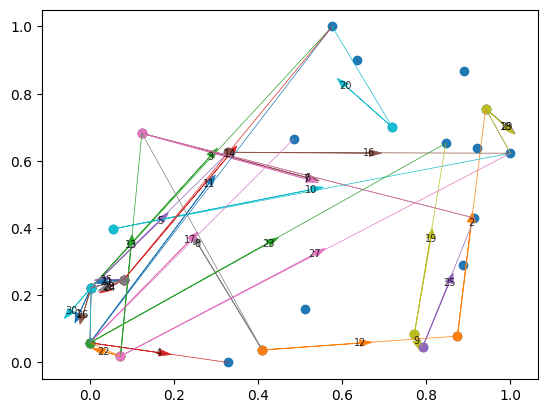

Final Validation Loss: 0.6872


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2726.64it/s]


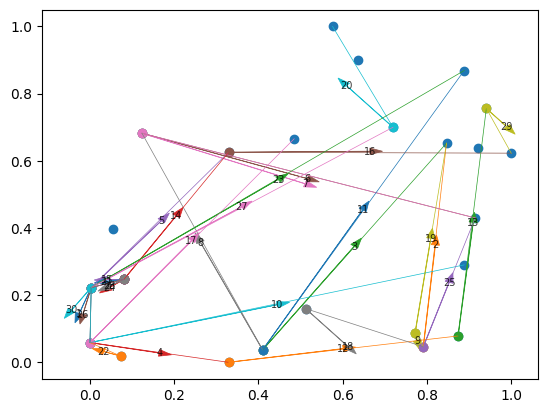

Final Validation Loss: 0.5830


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2141.85it/s]


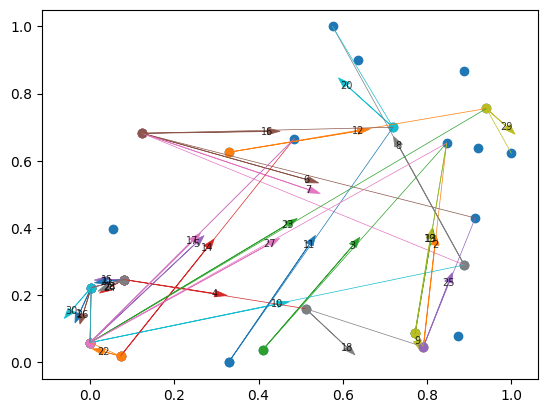

Final Validation Loss: 0.4886


Layer1 sampling: 100%|██████████| 30/30 [00:00<00:00, 2143.78it/s]


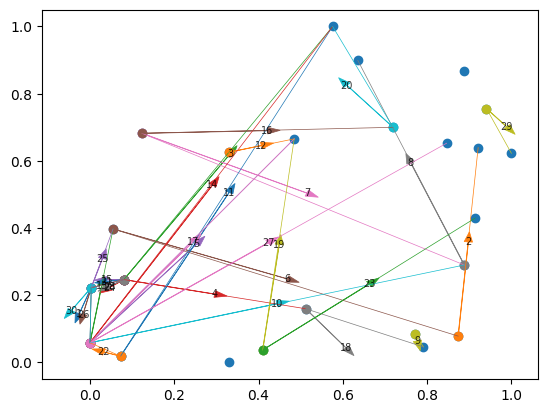

In [40]:
xd = 2  # Input space dimensions
num_samples = 30  # Number of data points
layer_width = 20

dataset = Dataset().create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

model = NeuralNet()

initial_epochs = 20
d_epochs = 20
model.fit(dataset.X_train, dataset.y_train, layers=[30], epochs=initial_epochs, validation_split=0.3)
x = model.model.evaluate(dataset.X_test, dataset.y_test, verbose=0)

# Initial training
for i in range(10):
    model.resume_training(
        dataset.X_train,
        dataset.y_train,
        initial_epoch=initial_epochs,
        epochs=initial_epochs + d_epochs,
        validation_split=0.2,
    )

    # Evaluate the model after additional training
    x = model.model.evaluate(dataset.X_test, dataset.y_test, verbose=0)

    print(f"Final Validation Loss: {x:.4f}")
    weights_l1, biases_l1, x_1_x2_tuples = compute_weights_biases_layer1(
        dataset.X_train, model.weights, model.biases, radius=0.2
    )

    # plot_vector_differences([weights_l1], [model.weights[0]])

    plot_weight_vectors_and_point_pairs(dataset.X_train, x_1_x2_tuples, np.transpose(model.weights[0]))
    initial_epochs += d_epochs